<a href="https://colab.research.google.com/github/calarconf/computacion-visual/blob/main/Taller7_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

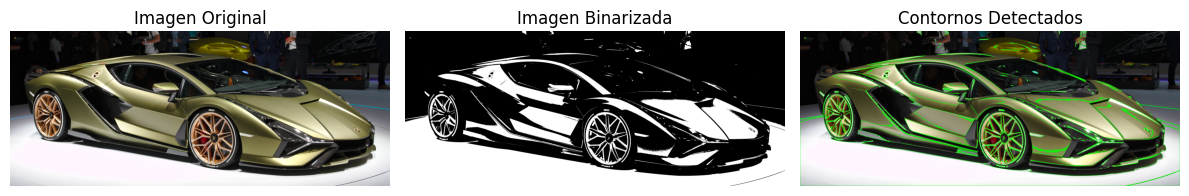

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar imagen y convertir a escala de grises

image_path = "/content/lambo.jpg"  # Cambia por tu ruta de imagen
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Binarización con threshold
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 3. Detección de contornos
contours, hierarchy = cv2.findContours(
    thresh,
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_SIMPLE
)

# 4. Dibujar contornos sobre la imagen original
img_contours = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)

# 5. Mostrar resultados con matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title('Imagen Binarizada')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title('Contornos Detectados')
plt.axis('off')

plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(3917.5), np.float64(1592.5), np.float64(-0.5))

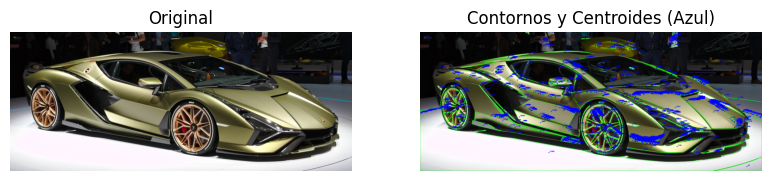

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen y convertir a grises
image_path = "/content/lambo.jpg"  # Cambia por tu ruta de imagen
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Binarización
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Detección de contornos
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Crear una copia para dibujar los centroides
img_contours = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)

# Lista para almacenar las propiedades
contour_properties = []

# Calcular propiedades para cada contorno
for i, contour in enumerate(contours):
    # Área
    area = cv2.contourArea(contour)

    # Perímetro (longitud del contorno)
    perimeter = cv2.arcLength(contour, closed=True)

    # Momentos para el centroide
    M = cv2.moments(contour)
    if M['m00'] != 0:  # Evitar división por cero
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    # Almacenar propiedades
    contour_properties.append({
        'contour_id': i,
        'area': area,
        'perimeter': perimeter,
        'centroid': (cx, cy)
    })

    # Dibujar centroide y texto
    cv2.circle(img_contours, (cx, cy), 5, (255, 0, 0), -1)
    cv2.putText(img_contours,
                f"C{i}",
                (cx + 10, cy - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255, 0, 0), 2)

# Mostrar resultados
plt.figure(figsize=(15, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

# Contornos con centroides
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title('Contornos y Centroides (Azul)')
plt.axis('off')

# # Tabla de propiedades
# plt.subplot(1, 3, 3)
# plt.axis('off')
# columns = ('ID', 'Área', 'Perímetro', 'Centroide')
# cell_text = []
# for prop in contour_properties:
#     cell_text.append([
#         prop['contour_id'],
#         f"{prop['area']:.2f}",
#         f"{prop['perimeter']:.2f}",
#         f"{prop['centroid']}"
#     ])
# plt.table(cellText=cell_text,
#           colLabels=columns,
#           loc='center',
#           cellLoc='center')
# plt.title('Propiedades de Contornos')

# plt.tight_layout()
# plt.show()

# Descomentar este código para imprimir propiedades en consola
# print("\nResumen de propiedades:")
# for prop in contour_properties:
#     print(f"Contorno {prop['contour_id']}:")
#     print(f"  Área: {prop['area']:.2f} píxeles²")
#     print(f"  Perímetro: {prop['perimeter']:.2f} píxeles")
#     print(f"  Centroide: {prop['centroid']}\n")

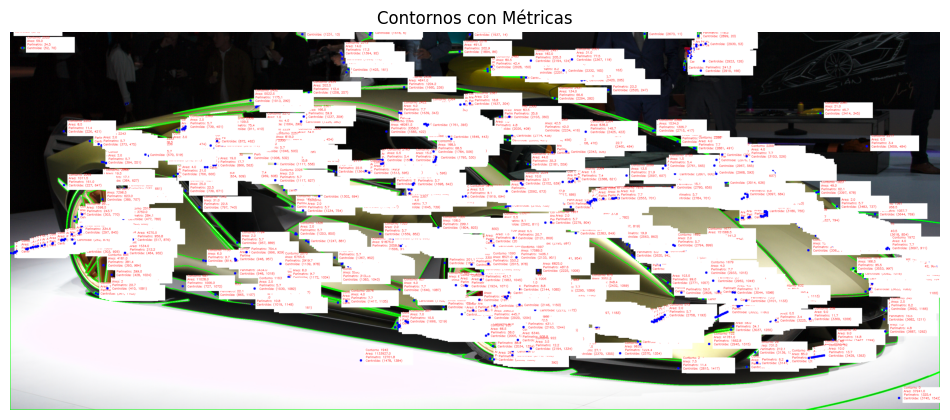

Resumen de métricas por contorno:
Contorno 0:
  Área: 37941.00
  Perímetro: 1325.45
  Centroide: (1231, 13)

Contorno 1:
  Área: 27.00
  Perímetro: 22.49
  Centroide: (1231, 13)

Contorno 2:
  Área: 7.50
  Perímetro: 11.41
  Centroide: (1231, 13)

Contorno 3:
  Área: 34.00
  Perímetro: 28.49
  Centroide: (1231, 13)

Contorno 4:
  Área: 2.50
  Perímetro: 6.24
  Centroide: (1231, 13)

Contorno 5:
  Área: 31.00
  Perímetro: 22.49
  Centroide: (1231, 13)

Contorno 6:
  Área: 1.50
  Perímetro: 6.24
  Centroide: (1231, 13)

Contorno 7:
  Área: 0.00
  Perímetro: 0.00
  Centroide: (1231, 13)

Contorno 8:
  Área: 0.00
  Perímetro: 4.00
  Centroide: (1231, 13)

Contorno 9:
  Área: 183.00
  Perímetro: 75.46
  Centroide: (1231, 13)

Contorno 10:
  Área: 0.00
  Perímetro: 0.00
  Centroide: (1231, 13)

Contorno 11:
  Área: 0.00
  Perímetro: 0.00
  Centroide: (1231, 13)

Contorno 12:
  Área: 203.50
  Perímetro: 64.04
  Centroide: (1231, 13)

Contorno 13:
  Área: 155.50
  Perímetro: 57.21
  Centroide:

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen y convertir a grises
image_path = "/content/lambo.jpg"  # Cambia por tu ruta de imagen
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Binarización
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Detección de contornos
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Crear una copia para dibujar
img_contours = img.copy()

# Dibujar todos los contornos
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

# Calcular y dibujar métricas para cada contorno
for i, contour in enumerate(contours):
    # Calcular propiedades
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    M = cv2.moments(contour)

    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
    else:
        cx, cy = 0, 0

    # Configurar texto
    text_lines = [
        f'Contorno {i}',
        f'Area: {area:.1f}',
        f'Perimetro: {perimeter:.1f}',
        f'Centroide: ({cx}, {cy})'
    ]

    # Posición inicial del texto
    text_x = cx + 20
    text_y = cy - 40

    # Dibujar fondo para mejor legibilidad
    cv2.rectangle(img_contours,
                 (text_x - 5, text_y - 5),
                 (text_x + 200, text_y + 60),
                 (255, 255, 255),
                 -1)

    # Dibujar cada línea de texto
    for line in text_lines:
        cv2.putText(img_contours, line, (text_x, text_y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)
        text_y += 15

    # Dibujar punto en el centroide
    cv2.circle(img_contours, (cx, cy), 5, (255, 0, 0), -1)

# Configurar visualización
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title('Contornos con Métricas')
plt.axis('off')
plt.show()

# Mostrar valores en consola
print("Resumen de métricas por contorno:")
for i, contour in enumerate(contours):
    props = {
        'area': cv2.contourArea(contour),
        'perimeter': cv2.arcLength(contour, True),
        'centroid': (cx, cy)
    }
    print(f"Contorno {i}:")
    print(f"  Área: {props['area']:.2f}")
    print(f"  Perímetro: {props['perimeter']:.2f}")
    print(f"  Centroide: {props['centroid']}\n")